# Data reading

In [1]:
import pandas as pd
file_path = r"C:/Users/ciphe/OneDrive/Documents/Modified_PS_DS.xlsx"

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Display the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Company                          195 non-null    object
 1   Industry                         195 non-null    object
 2   Date                             195 non-null    object
 3   vacancy quantity                 195 non-null    int64 
 4   Interviewed                      195 non-null    int64 
 5   KIV                              195 non-null    int64 
 6   Rejected                         195 non-null    int64 
 7   Selected                         195 non-null    int64 
 8   Rank & file                      195 non-null    object
 9   PMET                             195 non-null    object
 10  Region                           195 non-null    object
 11  Method                           195 non-null    object
 12  Successful Placement             195

# Data cleaning

## Missing values

In [2]:
# Find the number of missing values in each column
missing_values = df.isnull().sum()

# Display the number of missing values
print(missing_values)

Company                            0
Industry                           0
Date                               0
vacancy quantity                   0
Interviewed                        0
KIV                                0
Rejected                           0
Selected                           0
Rank & file                        0
PMET                               0
Region                             0
Method                             0
Successful Placement               0
Distance                           0
Salary                             0
Hours                              0
Suitability Issue                  0
Salary.1                           0
Experience/\nQualification         0
Health / Medical / Age / Others    0
Pasir Ris Central                  0
Pasir Ris East                     0
Pasir Ris West                     0
Punggol Coast                      0
Punggol Shore                      0
Punggol West                       0
Sengkang & Others                  0
d

## Duplicates

In [3]:
import pandas as pd

duplicates = df[df.duplicated()]
# check for duplicates
if duplicates.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found:")
    print(duplicates)


No duplicate rows found.


## Consistency

In [4]:
# Capitalize string columns
df[df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').apply(lambda x: x.str.capitalize())

# Ensure constant decimal places in numeric columns
dp = 2  # Set the desired number of decimal places
df[df.select_dtypes(include='float').columns] = df.select_dtypes(include='float').apply(lambda x: round(x, dp))

df.head()

,Company,Industry,Date,vacancy quantity,Interviewed,KIV,Rejected,Selected,Rank & file,PMET,...,Salary.1,Experience/\nQualification,Health / Medical / Age / Others,Pasir Ris Central,Pasir Ris East,Pasir Ris West,Punggol Coast,Punggol Shore,Punggol West,Sengkang & Others
0,active global respite care pte ltd,Healthcare & welfare,8 feb 2023,31,3,2,1,0,Y,Y,...,No comment,- min requirements not met,No comment,0,0,0,0,1,0,2
1,breadtalk group pte ltd,Fnb,8 feb 2023,467,16,14,1,1,Y,Y,...,No comment,No comment,- physically unfit,0,3,1,1,2,0,9
2,caregiving welfare association,Social service,8 feb 2023,40,2,1,1,0,N,Y,...,No comment,No comment,- uno commentble to commit schedule,1,0,0,0,0,0,1
3,dhl supply chain singapore pte ltd,,8 feb 2023,152,9,2,3,4,Y,Y,...,No comment,- no relevant \nexp,- unsuitable,0,4,1,0,0,1,3
4,holiday inn singapore atrium,Hospitality,8 feb 2023,18,2,1,0,1,Y,Y,...,No comment,No comment,No comment,0,0,1,0,0,0,1


## Outliers

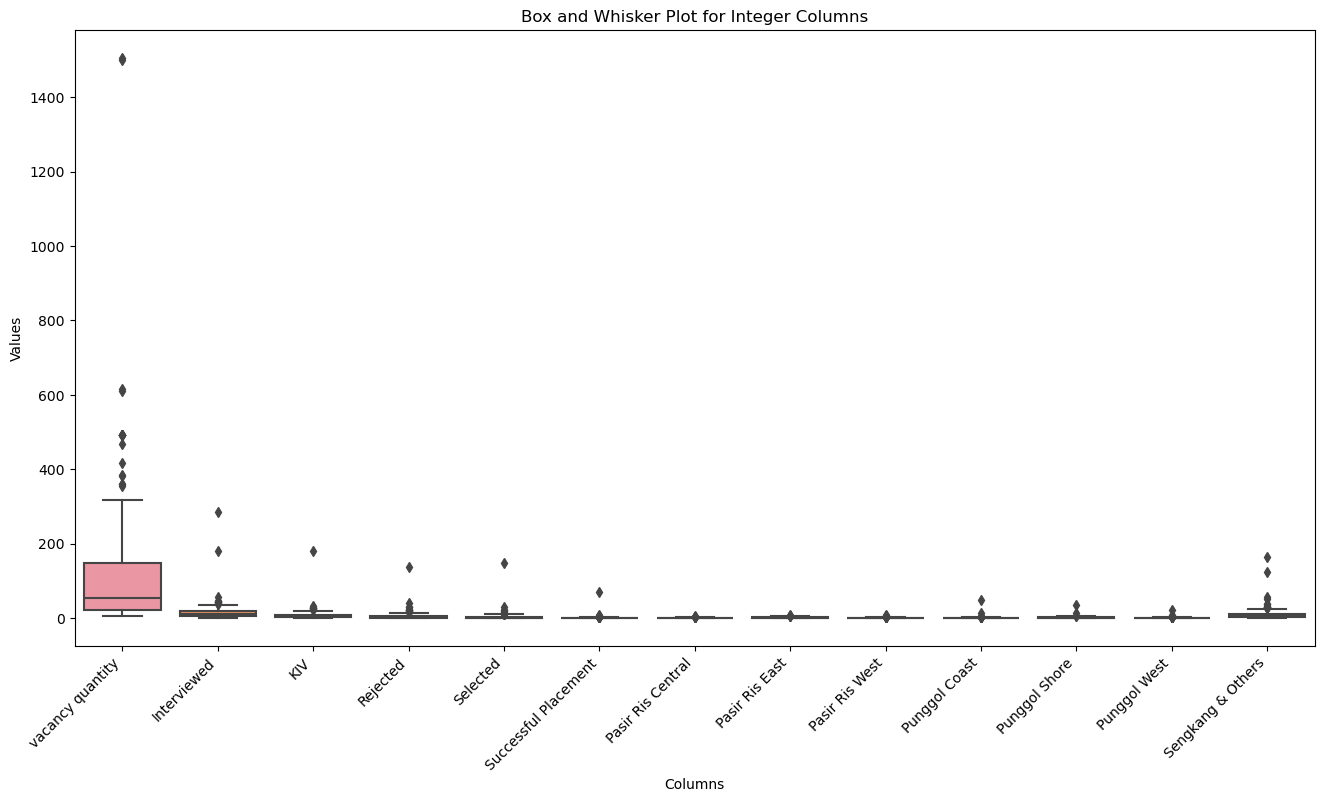

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
int_columns = df.select_dtypes(include=['int64']).columns

plt.figure(figsize=(16, 8))
sns.boxplot(data=df[int_columns])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box and Whisker Plot for Integer Columns')
plt.show()



In [6]:
odf = df.copy()
odf.head()

,Company,Industry,Date,vacancy quantity,Interviewed,KIV,Rejected,Selected,Rank & file,PMET,...,Salary.1,Experience/\nQualification,Health / Medical / Age / Others,Pasir Ris Central,Pasir Ris East,Pasir Ris West,Punggol Coast,Punggol Shore,Punggol West,Sengkang & Others
0,active global respite care pte ltd,Healthcare & welfare,8 feb 2023,31,3,2,1,0,Y,Y,...,No comment,- min requirements not met,No comment,0,0,0,0,1,0,2
1,breadtalk group pte ltd,Fnb,8 feb 2023,467,16,14,1,1,Y,Y,...,No comment,No comment,- physically unfit,0,3,1,1,2,0,9
2,caregiving welfare association,Social service,8 feb 2023,40,2,1,1,0,N,Y,...,No comment,No comment,- uno commentble to commit schedule,1,0,0,0,0,0,1
3,dhl supply chain singapore pte ltd,,8 feb 2023,152,9,2,3,4,Y,Y,...,No comment,- no relevant \nexp,- unsuitable,0,4,1,0,0,1,3
4,holiday inn singapore atrium,Hospitality,8 feb 2023,18,2,1,0,1,Y,Y,...,No comment,No comment,No comment,0,0,1,0,0,0,1


## Label encoding

In [7]:
# Encode nominal column column
df['Company'] = pd.factorize(df['Company'])[0]

df['Industry'] = pd.factorize(df['Industry'])[0]

df['Region'] = pd.factorize(df['Region'])[0]

df['Method'] = pd.factorize(df['Method'])[0]

df.head()

,Company,Industry,Date,vacancy quantity,Interviewed,KIV,Rejected,Selected,Rank & file,PMET,...,Salary.1,Experience/\nQualification,Health / Medical / Age / Others,Pasir Ris Central,Pasir Ris East,Pasir Ris West,Punggol Coast,Punggol Shore,Punggol West,Sengkang & Others
0,0,0,8 feb 2023,31,3,2,1,0,Y,Y,...,No comment,- min requirements not met,No comment,0,0,0,0,1,0,2
1,1,1,8 feb 2023,467,16,14,1,1,Y,Y,...,No comment,No comment,- physically unfit,0,3,1,1,2,0,9
2,2,2,8 feb 2023,40,2,1,1,0,N,Y,...,No comment,No comment,- uno commentble to commit schedule,1,0,0,0,0,0,1
3,3,3,8 feb 2023,152,9,2,3,4,Y,Y,...,No comment,- no relevant \nexp,- unsuitable,0,4,1,0,0,1,3
4,4,4,8 feb 2023,18,2,1,0,1,Y,Y,...,No comment,No comment,No comment,0,0,1,0,0,0,1


## One hot encoding

In [8]:
# one hot encoding for binary column
df['PMET'] = df['PMET'].replace({'Y': 1, 'N': 0})
df['Rank & file'] = df['Rank & file'].replace({'Y': 1, 'N': 0})
df.head()

,Company,Industry,Date,vacancy quantity,Interviewed,KIV,Rejected,Selected,Rank & file,PMET,...,Salary.1,Experience/\nQualification,Health / Medical / Age / Others,Pasir Ris Central,Pasir Ris East,Pasir Ris West,Punggol Coast,Punggol Shore,Punggol West,Sengkang & Others
0,0,0,8 feb 2023,31,3,2,1,0,1,1,...,No comment,- min requirements not met,No comment,0,0,0,0,1,0,2
1,1,1,8 feb 2023,467,16,14,1,1,1,1,...,No comment,No comment,- physically unfit,0,3,1,1,2,0,9
2,2,2,8 feb 2023,40,2,1,1,0,0,1,...,No comment,No comment,- uno commentble to commit schedule,1,0,0,0,0,0,1
3,3,3,8 feb 2023,152,9,2,3,4,1,1,...,No comment,- no relevant \nexp,- unsuitable,0,4,1,0,0,1,3
4,4,4,8 feb 2023,18,2,1,0,1,1,1,...,No comment,No comment,No comment,0,0,1,0,0,0,1


## converting to datetime format

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%d %b %Y')  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Company                          195 non-null    int64         
 1   Industry                         195 non-null    int64         
 2   Date                             195 non-null    datetime64[ns]
 3   vacancy quantity                 195 non-null    int64         
 4   Interviewed                      195 non-null    int64         
 5   KIV                              195 non-null    int64         
 6   Rejected                         195 non-null    int64         
 7   Selected                         195 non-null    int64         
 8   Rank & file                      195 non-null    int64         
 9   PMET                             195 non-null    int64         
 10  Region                           195 non-null    int64        

In [10]:
to_drop = df.select_dtypes(include='object')
# Drop the object columns
df.drop(to_drop.columns, axis=1, inplace=True)  # inplace modifies df directly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Company               195 non-null    int64         
 1   Industry              195 non-null    int64         
 2   Date                  195 non-null    datetime64[ns]
 3   vacancy quantity      195 non-null    int64         
 4   Interviewed           195 non-null    int64         
 5   KIV                   195 non-null    int64         
 6   Rejected              195 non-null    int64         
 7   Selected              195 non-null    int64         
 8   Rank & file           195 non-null    int64         
 9   PMET                  195 non-null    int64         
 10  Region                195 non-null    int64         
 11  Method                195 non-null    int64         
 12  Successful Placement  195 non-null    int64         
 13  Pasir Ris Central   

# Data transformation

## Creation of 'Punggol' + 'Pasir Ris' column. 

In [11]:
df['Pasir ris'] = df['Pasir Ris Central'] + df['Pasir Ris East'] + df['Pasir Ris West']
df['Punggol'] = df['Punggol Coast'] + df['Punggol Shore'] + df['Punggol West']
# Display the DataFrame to verify the changes
df.head()

,Company,Industry,Date,vacancy quantity,Interviewed,KIV,Rejected,Selected,Rank & file,PMET,...,Successful Placement,Pasir Ris Central,Pasir Ris East,Pasir Ris West,Punggol Coast,Punggol Shore,Punggol West,Sengkang & Others,Pasir ris,Punggol
0,0,0,2023-02-08,31,3,2,1,0,1,1,...,0,0,0,0,0,1,0,2,0,1
1,1,1,2023-02-08,467,16,14,1,1,1,1,...,0,0,3,1,1,2,0,9,4,3
2,2,2,2023-02-08,40,2,1,1,0,0,1,...,0,1,0,0,0,0,0,1,1,0
3,3,3,2023-02-08,152,9,2,3,4,1,1,...,3,0,4,1,0,0,1,3,5,1
4,4,4,2023-02-08,18,2,1,0,1,1,1,...,0,0,0,1,0,0,0,1,1,0


In [12]:
# Duplicate the 'Date' column
df['DM'] = df['Date']

# Extract month and day, and drop the year part
df['DM'] = df['DM'].dt.strftime('%m-%d')
df.head()

,Company,Industry,Date,vacancy quantity,Interviewed,KIV,Rejected,Selected,Rank & file,PMET,...,Pasir Ris Central,Pasir Ris East,Pasir Ris West,Punggol Coast,Punggol Shore,Punggol West,Sengkang & Others,Pasir ris,Punggol,DM
0,0,0,2023-02-08,31,3,2,1,0,1,1,...,0,0,0,0,1,0,2,0,1,02-08
1,1,1,2023-02-08,467,16,14,1,1,1,1,...,0,3,1,1,2,0,9,4,3,02-08
2,2,2,2023-02-08,40,2,1,1,0,0,1,...,1,0,0,0,0,0,1,1,0,02-08
3,3,3,2023-02-08,152,9,2,3,4,1,1,...,0,4,1,0,0,1,3,5,1,02-08
4,4,4,2023-02-08,18,2,1,0,1,1,1,...,0,0,1,0,0,0,1,1,0,02-08


In [13]:
# Split 'DM' column into 'month' and 'day' columns
df[['month', 'day']] = df['DM'].str.split('-', expand=True)

# Convert 'month' and 'day' columns to integers
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Company               195 non-null    int64         
 1   Industry              195 non-null    int64         
 2   Date                  195 non-null    datetime64[ns]
 3   vacancy quantity      195 non-null    int64         
 4   Interviewed           195 non-null    int64         
 5   KIV                   195 non-null    int64         
 6   Rejected              195 non-null    int64         
 7   Selected              195 non-null    int64         
 8   Rank & file           195 non-null    int64         
 9   PMET                  195 non-null    int64         
 10  Region                195 non-null    int64         
 11  Method                195 non-null    int64         
 12  Successful Placement  195 non-null    int64         
 13  Pasir Ris Central   

## Heat map to see degree of linear correlation

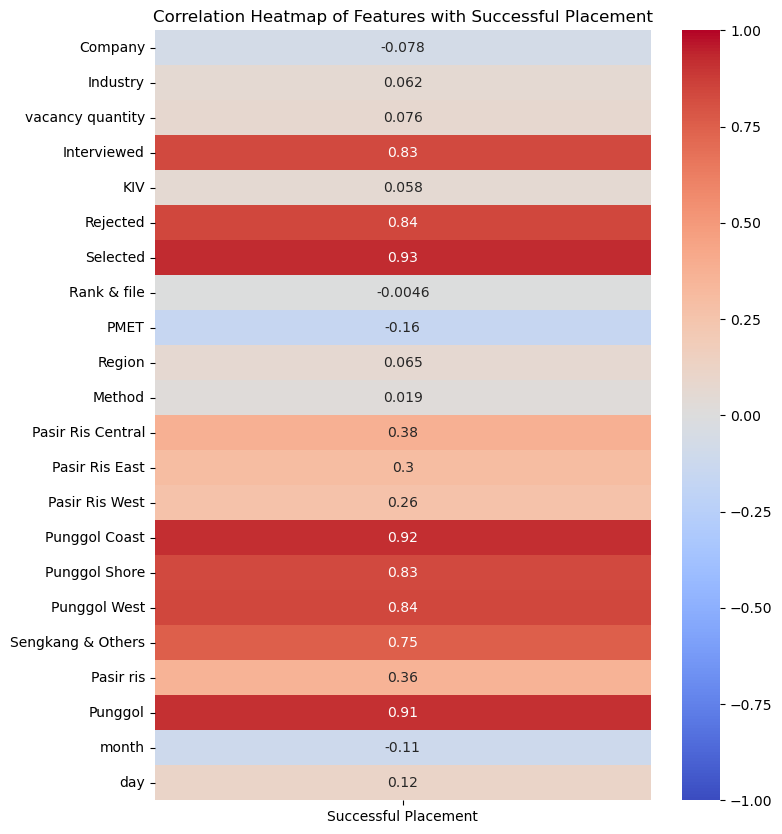

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the target column
target_col = 'Successful Placement'

# Select columns for correlation (excluding specified columns)
exclude_cols = ['Date', 'DM', target_col]
correlation_cols = [col for col in df.columns if col not in exclude_cols]

# Calculate the correlation matrix
correlation_with_target = df[correlation_cols + [target_col]].corr()[target_col].drop(target_col)

# Alternatively, plot the heatmap for better visual representation
plt.figure(figsize=(8, 10))
sns.heatmap(correlation_with_target.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Correlation Heatmap of Features with {target_col}')
plt.show()


## Multicollinearity 

In [15]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# Drop columns 'Date', 'DM', 'target_col'
cols_to_exclude = ['Date', 'DM', 'Pasir Ris Central', 'Pasir Ris East', 'Pasir Ris West',
                    'Punggol Coast', 'Punggol Shore', 'Punggol West',]
df_filtered = df.drop(columns=cols_to_exclude)

# Add a constant term to the DataFrame for VIF calculation
df_filtered['Intercept'] = 1

# Get the matrix of features for VIF calculation
X = df_filtered

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop the Intercept row as it is not an actual feature
vif = vif[vif['Variable'] != 'Intercept']

print(vif)


                Variable        VIF
0                Company   1.992367
1               Industry   1.245853
2       vacancy quantity   1.398329
3            Interviewed  35.167290
4                    KIV  60.959149
5               Rejected  43.849227
6               Selected  46.618949
7            Rank & file   1.106912
8                   PMET   1.458898
9                 Region   1.474432
10                Method   1.334898
11  Successful Placement  15.735787
12     Sengkang & Others  95.839739
13             Pasir ris   5.169321
14               Punggol  38.261694
15                 month   2.209537
16                   day   1.228556


## Histogram to identify possible class imbalance in Successful Placement

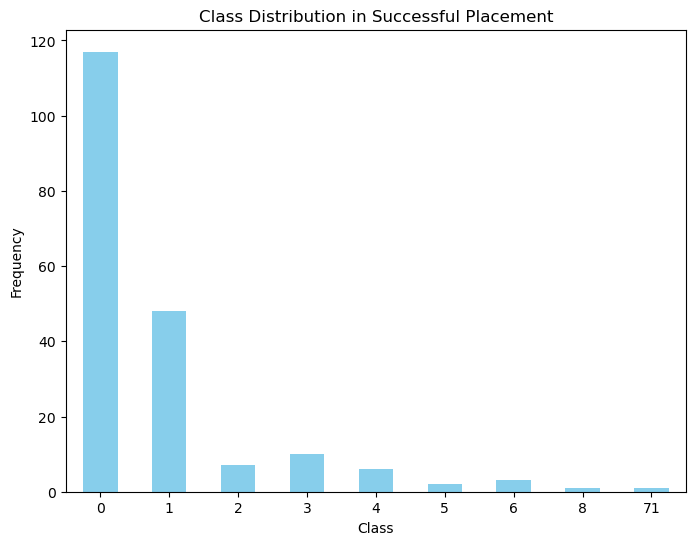

In [16]:
import matplotlib.pyplot as plt

# Count the occurrences of each class in the target column and sort by index (class values)
class_counts = df['Successful Placement'].value_counts().sort_index()

# Plotting the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution in Successful Placement')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

## Linear regression

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Split the data into features (X) and target (y)
X = df.drop(columns=['Successful Placement', 'DM', 'Date'])
y = df['Successful Placement']

# Split the data into training and testing sets with random_state set to 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean absolute error:", mae)

Mean Squared Error: 1.6716416805894103
Mean absolute error: 0.8506169458522527


## No infinity value VIF

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Split the data into features (X) and target (y)
X = df.drop(columns=['Successful Placement', 'DM', 'Date', 'Company', 'Selected','Pasir Ris Central', 'Pasir Ris East', 'Pasir Ris West',
                    'Punggol Coast', 'Punggol Shore', 'Punggol West'])
y = df['Successful Placement']

# Split the data into training and testing sets with random_state set to 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean absolute error:", mae)

Mean Squared Error: 1.4031415683010546
Mean absolute error: 0.8965550883210804


## Hyperparam linear regressor(Ridge)

In [19]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the model
ridge = Ridge()

# Define the parameter grid
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}

# Implement GridSearchCV
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)

# Train the model
ridge_cv.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_cv.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)


print("Ridge Regression:")
print("Best alpha:", ridge_cv.best_params_)
print("Mean Squared Error:", mse_ridge)
print("Mean Absolute Error:", mae_ridge)


Ridge Regression:
Best alpha: {'alpha': 100}
Mean Squared Error: 1.4558917407984944
Mean Absolute Error: 0.8835841396772204


## Hyperparam linear regression(LASSO)

In [20]:
from sklearn.linear_model import Lasso

# Define the model
lasso = Lasso(max_iter=100000)

# Define the parameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Implement GridSearchCV
lasso_cv = GridSearchCV(lasso, param_grid, cv=5)

# Train the model
lasso_cv.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_cv.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print("Lasso Regression:")
print("Best alpha:", lasso_cv.best_params_)
print("Mean Squared Error:", mse_lasso)
print("Mean Absolute Error:", mae_lasso)

Lasso Regression:
Best alpha: {'alpha': 100}
Mean Squared Error: 1.7203739404208078
Mean Absolute Error: 1.033652830375971


## Hyperparam linear regression(ELASTIC NET)

In [21]:
from sklearn.linear_model import ElasticNet

# Define the model
elastic_net = ElasticNet(max_iter = 100000)

# Define the parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1]
}

# Implement GridSearchCV
elastic_net_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Train the model
elastic_net_cv.fit(X_train, y_train)

# Make predictions
y_pred_elastic_net = elastic_net_cv.predict(X_test)

# Evaluate the model
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
mae_elastic_net = mean_absolute_error(y_test, y_pred_elastic_net)

print("ElasticNet Regression:")
print("Best parameters:", elastic_net_cv.best_params_)
print("Mean Squared Error:", mse_elastic_net)
print("Mean Absolute Error:", mae_elastic_net)

ElasticNet Regression:
Best parameters: {'alpha': 100, 'l1_ratio': 1}
Mean Squared Error: 1.7203739404208078
Mean Absolute Error: 1.033652830375971


## logistic regression/ Classifiers

In [22]:
import pandas as pd
# Count the number of rows with Successful Placement value as 0
count_zeros = df[df['Successful Placement'] == 0].shape[0]

# Count the number of rows with Successful Placement value other than 0
count_non_zeros = df[df['Successful Placement'] != 0].shape[0]

print(f"Number of rows with Successful Placement = 0: {count_zeros}")
print(f"Number of rows with Successful Placement != 0: {count_non_zeros}")

Number of rows with Successful Placement = 0: 117
Number of rows with Successful Placement != 0: 78


In [23]:
# Create a copy of the DataFrame
cdf = df.copy()

# Convert rows with any number other than 0 to be 1 in the 'Successful Placement' column
cdf['Successful Placement'] = cdf['Successful Placement'].apply(lambda x: 1 if x != 0 else 0)
print(cdf['Successful Placement'].head())

0    0
1    0
2    0
3    1
4    0
Name: Successful Placement, dtype: int64


## Cell below for dropping columns in log reg

In [24]:
cdf.drop(['Date', 'DM'], axis = 1, inplace=True)

## baseline log reg model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score

# Separate features and target
X = cdf.drop(['Pasir Ris Central', 'Pasir Ris East', 'Pasir Ris West',
              'Punggol Coast', 'Punggol Shore', 'Punggol West', 'Successful Placement'], axis=1)
y = cdf['Successful Placement']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model without regularization
log_reg = LogisticRegression(penalty=None, max_iter=1000000)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train_B = log_reg.predict(X_train)

# Evaluate the model on the training data
print("Training Metrics:")
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_B))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train_B))
print("Training AUC-ROC:", roc_auc_score(y_train, log_reg.predict_proba(X_train)[:,1]))

# Make predictions on the test data
y_pred_test_B = log_reg.predict(X_test)

# Evaluate the model on the test data
print("\nTesting Metrics:")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test_B))
print("Testing Classification Report:\n", classification_report(y_test, y_pred_test_B))
print("Testing AUC-ROC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]))

Training Metrics:
Training Accuracy: 0.7564102564102564
Training Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.87      0.81        92
           1       0.76      0.59      0.67        64

    accuracy                           0.76       156
   macro avg       0.76      0.73      0.74       156
weighted avg       0.76      0.76      0.75       156

Training AUC-ROC: 0.8041779891304348

Testing Metrics:
Testing Accuracy: 0.6923076923076923
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76        25
           1       0.57      0.57      0.57        14

    accuracy                           0.69        39
   macro avg       0.67      0.67      0.67        39
weighted avg       0.69      0.69      0.69        39

Testing AUC-ROC: 0.7485714285714284


In [26]:
from sklearn.metrics import f1_score

# Calculate weighted F1 scores for the test and train sets
f1_test = f1_score(y_test, y_pred_test_B, average='weighted')
f1_train = f1_score(y_train, y_pred_train_B, average='weighted')

# Print the F1 scores
print("Weighted F1 Score for Test Set:", f1_test)
print("Weighted F1 Score for Training Set:", f1_train)

Weighted F1 Score for Test Set: 0.6923076923076923
Weighted F1 Score for Training Set: 0.75006475006475


## AUC ROC baseline

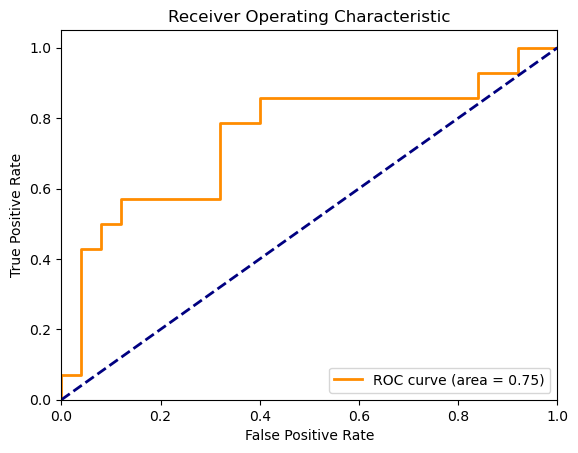

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve and AUC score for the test data
fpr, tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## default log reg

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score

# Separate features and target
X = cdf.drop(['Company','month','day', 'vacancy quantity', 'Selected','Pasir Ris Central', 'Pasir Ris East', 'Pasir Ris West',
                    'Punggol Coast', 'Punggol Shore', 'Punggol West', 'Successful Placement'], axis=1)
y = cdf['Successful Placement']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model without regularization
log_reg = LogisticRegression(penalty=None, max_iter=1000000)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train_og = log_reg.predict(X_train)

# Evaluate the model on the training data
print("Training Metrics:")
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_og))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train_og))
print("Training AUC-ROC:", roc_auc_score(y_train, log_reg.predict_proba(X_train)[:,1]))

# Make predictions on the test data
y_pred_test_og = log_reg.predict(X_test)

# Evaluate the model on the test data
print("\nTesting Metrics:")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test_og))
print("Testing Classification Report:\n", classification_report(y_test, y_pred_test_og))
print("Testing AUC-ROC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]))

# Print the features and their related coefficients
print("\nFeature Coefficients:")
for feature, coef in zip(X.columns, log_reg.coef_[0]):
    print(f"{feature}: {coef}")

Training Metrics:
Training Accuracy: 0.7564102564102564
Training Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.87      0.81        92
           1       0.76      0.59      0.67        64

    accuracy                           0.76       156
   macro avg       0.76      0.73      0.74       156
weighted avg       0.76      0.76      0.75       156

Training AUC-ROC: 0.7863451086956522

Testing Metrics:
Testing Accuracy: 0.7435897435897436
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        25
           1       0.64      0.64      0.64        14

    accuracy                           0.74        39
   macro avg       0.72      0.72      0.72        39
weighted avg       0.74      0.74      0.74        39

Testing AUC-ROC: 0.7285714285714285

Feature Coefficients:
Industry: 0.11483899269692936
Interviewed: 0.10520614488245826
KIV: -0.074

In [29]:
from sklearn.metrics import f1_score

# Calculate weighted F1 scores for the test and train sets
f1_test = f1_score(y_test, y_pred_test_og, average='weighted')
f1_train = f1_score(y_train, y_pred_train_og, average='weighted')

# Print the F1 scores
print("Weighted F1 Score for Test Set:", f1_test)
print("Weighted F1 Score for Training Set:", f1_train)


Weighted F1 Score for Test Set: 0.7435897435897437
Weighted F1 Score for Training Set: 0.75006475006475


### log reg coeff

In [30]:
# Print the features and their related coefficients
print("\nFeature Coefficients:")
for feature, coef in zip(X.columns, log_reg.coef_[0]):
    print(f"{feature}: {coef}")



Feature Coefficients:
Industry: 0.11483899269692936
Interviewed: 0.10520614488245826
KIV: -0.07485539789748066
Rejected: -0.04666917951559365
Rank & file: -1.8043864887998593
PMET: -1.1440415507118158
Region: 0.11556434350869611
Method: 0.22423140727208543
Sengkang & Others: 0.023345524413820814
Pasir ris: -0.009942211258144033
Punggol: -0.07319208816517095


## AUC ROC Curve(Default log reg)

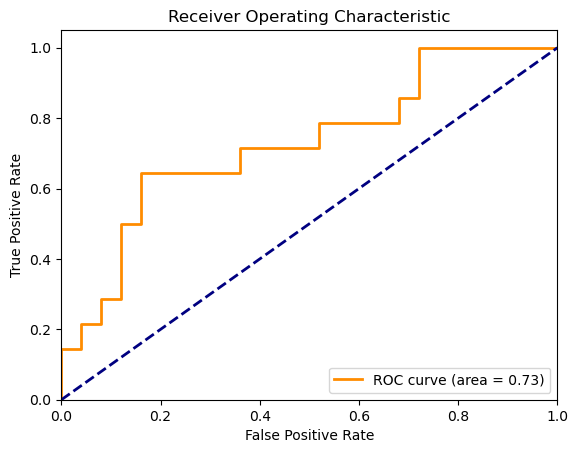

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve and AUC score for the test data
fpr, tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [32]:
unique_industries = cdf['Industry'].unique()
print("Unique values in the 'Industry' column:")
for industry in unique_industries:
    print(industry)

Unique values in the 'Industry' column:
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [33]:
import joblib

# Save the model to a file
joblib_file = "logistic_regression_model.joblib"
joblib.dump(log_reg, joblib_file)

print(f"Model saved to {joblib_file}")

Model saved to logistic_regression_model.joblib


## Default lasso reg

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Separate features and target
X = cdf.drop(['Company','month','day', 'vacancy quantity', 'Selected','Pasir Ris Central', 'Pasir Ris East', 'Pasir Ris West',
                    'Punggol Coast', 'Punggol Shore', 'Punggol West', 'Successful Placement'], axis=1)
y = cdf['Successful Placement']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model with Lasso regularization and max_iter set to 1 million
log_reg_lasso = LogisticRegression(penalty='l1', solver='saga', max_iter=1000000)

# Train the model on the training data
log_reg_lasso.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train_lasso = log_reg_lasso.predict(X_train)

# Evaluate the model on the training data
print("Training Metrics:")
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_lasso))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train_lasso))
print("Training AUC-ROC:", roc_auc_score(y_train, log_reg_lasso.predict_proba(X_train)[:,1]))

# Make predictions on the test data
y_pred_test_lasso = log_reg_lasso.predict(X_test)

# Evaluate the model on the test data
print("\nTesting Metrics:")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test_lasso))
print("Testing Classification Report:\n", classification_report(y_test, y_pred_test_lasso))
print("Testing AUC-ROC:", roc_auc_score(y_test, log_reg_lasso.predict_proba(X_test)[:,1]))


Training Metrics:
Training Accuracy: 0.7435897435897436
Training Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80        92
           1       0.74      0.58      0.65        64

    accuracy                           0.74       156
   macro avg       0.74      0.72      0.72       156
weighted avg       0.74      0.74      0.74       156

Training AUC-ROC: 0.778702445652174

Testing Metrics:
Testing Accuracy: 0.7435897435897436
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        25
           1       0.64      0.64      0.64        14

    accuracy                           0.74        39
   macro avg       0.72      0.72      0.72        39
weighted avg       0.74      0.74      0.74        39

Testing AUC-ROC: 0.7171428571428571


In [35]:
from sklearn.metrics import f1_score

# Calculate weighted F1 scores for the test and train sets
f1_test = f1_score(y_test, y_pred_test_lasso, average='weighted')
f1_train = f1_score(y_train, y_pred_train_lasso, average='weighted')

# Print the F1 scores
print("Weighted F1 Score for Test Set:", f1_test)
print("Weighted F1 Score for Training Set:", f1_train)

Weighted F1 Score for Test Set: 0.7435897435897437
Weighted F1 Score for Training Set: 0.7369102632260527


## AUC ROC lasso

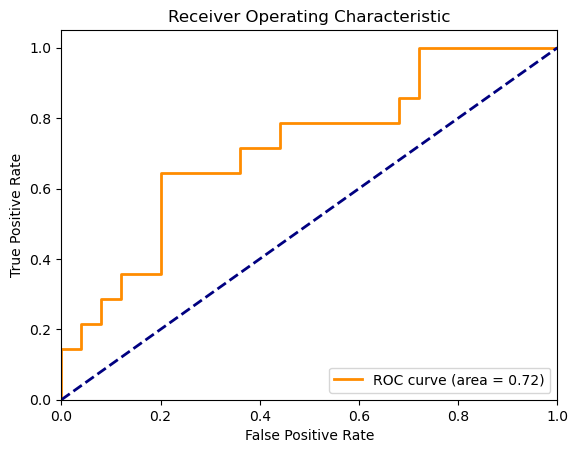

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve and AUC score for the test data
fpr, tpr, _ = roc_curve(y_test, log_reg_lasso.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## default ridge reg

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Separate features and target
X = cdf.drop(['Company','month','day', 'vacancy quantity', 'Selected','Pasir Ris Central', 'Pasir Ris East', 'Pasir Ris West',
                    'Punggol Coast', 'Punggol Shore', 'Punggol West', 'Successful Placement'], axis=1)
y = cdf['Successful Placement']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model with Ridge regularization
log_reg_ridge = LogisticRegression(penalty='l2', solver='saga', max_iter=1000000)

# Train the model on the training data
log_reg_ridge.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train_ridge = log_reg_ridge.predict(X_train)

# Evaluate the model on the training data
print("Training Metrics:")
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_ridge))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train_ridge))
print("Training AUC-ROC:", roc_auc_score(y_train, log_reg_ridge.predict_proba(X_train)[:,1]))

# Make predictions on the test data
y_pred_test_ridge = log_reg_ridge.predict(X_test)

# Evaluate the model on the test data
print("\nTesting Metrics:")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test_ridge))
print("Testing Classification Report:\n", classification_report(y_test, y_pred_test_ridge))
print("Testing AUC-ROC:", roc_auc_score(y_test, log_reg_ridge.predict_proba(X_test)[:,1]))



Training Metrics:
Training Accuracy: 0.7564102564102564
Training Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81        92
           1       0.77      0.58      0.66        64

    accuracy                           0.76       156
   macro avg       0.76      0.73      0.74       156
weighted avg       0.76      0.76      0.75       156

Training AUC-ROC: 0.7814198369565217

Testing Metrics:
Testing Accuracy: 0.7435897435897436
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        25
           1       0.64      0.64      0.64        14

    accuracy                           0.74        39
   macro avg       0.72      0.72      0.72        39
weighted avg       0.74      0.74      0.74        39

Testing AUC-ROC: 0.7285714285714285


In [38]:
from sklearn.metrics import f1_score

# Calculate weighted F1 scores for the test and train sets
f1_test = f1_score(y_test, y_pred_test_ridge, average='weighted')
f1_train = f1_score(y_train, y_pred_train_ridge, average='weighted')

# Print the F1 scores
print("Weighted F1 Score for Test Set:", f1_test)
print("Weighted F1 Score for Training Set:", f1_train)

Weighted F1 Score for Test Set: 0.7435897435897437
Weighted F1 Score for Training Set: 0.7487545787545787


## AUC ROC ridge

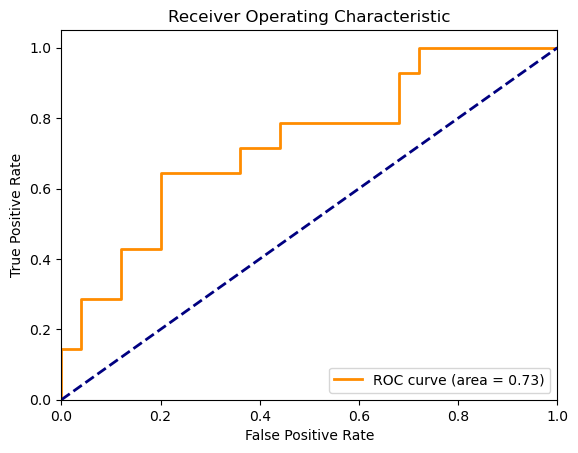

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve and AUC score for the test data
fpr, tpr, _ = roc_curve(y_test, log_reg_ridge.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Default elastic net reg

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Separate features and target
X = cdf.drop(['Company','month','day', 'vacancy quantity', 'Selected','Pasir Ris Central', 'Pasir Ris East', 'Pasir Ris West',
                    'Punggol Coast', 'Punggol Shore', 'Punggol West', 'Successful Placement'], axis=1)
y = cdf['Successful Placement']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model with Elastic Net regularization and random state
log_reg_en = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.2, max_iter=1000000, random_state=42)

# Train the model on the training data
log_reg_en.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train_en = log_reg_en.predict(X_train)

# Evaluate the model on the training data
print("Training Metrics:")
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_en))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train_en))
print("Training AUC-ROC:", roc_auc_score(y_train, log_reg_en.predict_proba(X_train)[:, 1]))

# Make predictions on the test data
y_pred_test_en = log_reg_en.predict(X_test)

# Evaluate the model on the test data
print("\nTesting Metrics:")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test_en))
print("Testing Classification Report:\n", classification_report(y_test, y_pred_test_en))
print("Testing AUC-ROC:", roc_auc_score(y_test, log_reg_en.predict_proba(X_test)[:, 1]))



Training Metrics:
Training Accuracy: 0.75
Training Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.88      0.81        92
           1       0.77      0.56      0.65        64

    accuracy                           0.75       156
   macro avg       0.75      0.72      0.73       156
weighted avg       0.75      0.75      0.74       156

Training AUC-ROC: 0.7804008152173914

Testing Metrics:
Testing Accuracy: 0.7435897435897436
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        25
           1       0.64      0.64      0.64        14

    accuracy                           0.74        39
   macro avg       0.72      0.72      0.72        39
weighted avg       0.74      0.74      0.74        39

Testing AUC-ROC: 0.7257142857142858


In [41]:
from sklearn.metrics import f1_score

# Calculate weighted F1 scores for the test and train sets
f1_test = f1_score(y_test, y_pred_test_en, average='weighted')
f1_train = f1_score(y_train, y_pred_train_en, average='weighted')

# Print the F1 scores
print("Weighted F1 Score for Test Set:", f1_test)
print("Weighted F1 Score for Training Set:", f1_train)

Weighted F1 Score for Test Set: 0.7435897435897437
Weighted F1 Score for Training Set: 0.7414279951593383


## Gridsearch Log reg

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Separate features and target
X = cdf.drop(['Company','month','day', 'vacancy quantity', 'Selected','Pasir Ris Central', 'Pasir Ris East', 'Pasir Ris West',
                    'Punggol Coast', 'Punggol Shore', 'Punggol West', 'Successful Placement'], axis=1)
y = cdf['Successful Placement']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['saga'],
    'max_iter': [10000]
}

# Create the logistic regression model with random state set to 42
log_reg_default = LogisticRegression(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(log_reg_default, param_grid, cv=5, n_jobs=-1, verbose=1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the training data using the best model
best_model = grid_search.best_estimator_
y_pred_train_default = best_model.predict(X_train)

# Evaluate the best model on the training data
print("Training Metrics:")
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_default))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train_default))
print("Training AUC-ROC:", roc_auc_score(y_train, best_model.predict_proba(X_train)[:, 1]))

# Make predictions on the test data using the best model
y_pred_test_default = best_model.predict(X_test)

# Evaluate the best model on the test data
print("\nTesting Metrics:")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test_default))
print("Testing Classification Report:\n", classification_report(y_test, y_pred_test_default))
print("Testing AUC-ROC:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 1, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'saga'}
Training Metrics:
Training Accuracy: 0.7564102564102564
Training Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81        92
           1       0.77      0.58      0.66        64

    accuracy                           0.76       156
   macro avg       0.76      0.73      0.74       156
weighted avg       0.76      0.76      0.75       156

Training AUC-ROC: 0.7814198369565217

Testing Metrics:
Testing Accuracy: 0.7435897435897436
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        25
           1       0.64      0.64      0.64        14

    accuracy                           0.74        39
   macro avg       0.72      0.72      0.72        39
weighted avg       0.74      0.74      0.74    

In [43]:
from sklearn.metrics import f1_score

# Calculate weighted F1 scores for the test and train sets
f1_test = f1_score(y_test, y_pred_test_default, average='weighted')
f1_train = f1_score(y_train, y_pred_train_default, average='weighted')

# Print the F1 scores
print("Weighted F1 Score for Test Set:", f1_test)
print("Weighted F1 Score for Training Set:", f1_train)

Weighted F1 Score for Test Set: 0.7435897435897437
Weighted F1 Score for Training Set: 0.7487545787545787


## Further exploration Gridsearch Log reg

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Separate features and target
X = cdf.drop(['Company','month','day', 'vacancy quantity', 'Selected','Pasir Ris Central', 'Pasir Ris East', 'Pasir Ris West',
                    'Punggol Coast', 'Punggol Shore', 'Punggol West', 'Successful Placement'], axis=1)
y = cdf['Successful Placement']
# Create the logistic regression model
log_reg = LogisticRegression(random_state=42)

# Define separate parameter grids for different penalties
param_grid = [
    {
        'penalty': ['l1'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear'],
        'max_iter': [1000000],
        'tol': [1e-4, 1e-3, 1e-2],
        'fit_intercept': [True, False],
        'class_weight': [None, 'balanced']
    },
    {
        'penalty': ['l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['saga'],
        'max_iter': [1000000],
        'tol': [1e-4, 1e-3, 1e-2],
        'fit_intercept': [True, False],
        'class_weight': [None, 'balanced']
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['saga'],
        'max_iter': [1000000],
        'tol': [1e-4, 1e-3, 1e-2],
        'fit_intercept': [True, False],
        'class_weight': [None, 'balanced'],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
    }
]

# Create GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, n_jobs=-1, verbose=1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the training data using the best model
best_model = grid_search.best_estimator_
y_pred_train_GLR = best_model.predict(X_train)

# Make predictions on the test data using the best model
y_pred_test_GLR = best_model.predict(X_test)

# Evaluate the best model on the training data
print("Training Metrics:")
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_GLR))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train_GLR))
print("Training AUC-ROC:", roc_auc_score(y_train, best_model.predict_proba(X_train)[:, 1]))

# Evaluate the best model on the test data
print("\nTesting Metrics:")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test_GLR))
print("Testing Classification Report:\n", classification_report(y_test, y_pred_test_GLR))
print("Testing AUC-ROC:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))



Fitting 5 folds for each of 504 candidates, totalling 2520 fits
Best Parameters: {'C': 1, 'class_weight': None, 'fit_intercept': True, 'max_iter': 1000000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}
Training Metrics:
Training Accuracy: 0.7564102564102564
Training Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.87      0.81        92
           1       0.76      0.59      0.67        64

    accuracy                           0.76       156
   macro avg       0.76      0.73      0.74       156
weighted avg       0.76      0.76      0.75       156

Training AUC-ROC: 0.7809103260869565

Testing Metrics:
Testing Accuracy: 0.717948717948718
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78        25
           1       0.60      0.64      0.62        14

    accuracy                           0.72        39
   macro avg       0.70      0.7

In [45]:
from sklearn.metrics import f1_score

# Calculate weighted F1 scores for the test and train sets
f1_test = f1_score(y_test, y_pred_test_GLR, average='weighted')
f1_train = f1_score(y_train, y_pred_train_GLR, average='weighted')

# Print the F1 scores
print("Weighted F1 Score for Test Set:", f1_test)
print("Weighted F1 Score for Training Set:", f1_train)

Weighted F1 Score for Test Set: 0.7199335967808874
Weighted F1 Score for Training Set: 0.75006475006475


In [46]:
# Apply SMOTE with n_neighbors=2
from imblearn.over_sampling import SMOTE
# Separate features and target
X = cdf.drop(['Company','month','day', 'vacancy quantity', 'Selected','Pasir Ris Central', 'Pasir Ris East', 'Pasir Ris West',
                    'Punggol Coast', 'Punggol Shore', 'Punggol West', 'Successful Placement'], axis=1)
y = cdf['Successful Placement']
smote = SMOTE(k_neighbors=2)
X_smote, y_smote = smote.fit_resample(X, y)

# Check the new value counts
print(y_smote.value_counts())

Successful Placement
0    117
1    117
Name: count, dtype: int64


## SMOTE Log reg

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
# Separate features and target
X = cdf.drop(['Company','month','day', 'vacancy quantity', 'Selected','Pasir Ris Central', 'Pasir Ris East', 'Pasir Ris West',
                    'Punggol Coast', 'Punggol Shore', 'Punggol West', 'Successful Placement'], axis=1)
y = cdf['Successful Placement']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Create the logistic regression model
log_reg = LogisticRegression(max_iter=10000)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train_SLR = log_reg.predict(X_train)

# Make predictions on the test data
y_pred_test_SLR = log_reg.predict(X_test)

# Evaluate the model on the training data
print("Training Metrics:")
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_SLR))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train_SLR))
print("Training AUC-ROC:", roc_auc_score(y_train, log_reg.predict_proba(X_train)[:, 1]))

# Evaluate the model on the test data
print("\nTesting Metrics:")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test_SLR))
print("Testing Classification Report:\n", classification_report(y_test, y_pred_test_SLR))
print("Testing AUC-ROC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))


Training Metrics:
Training Accuracy: 0.7540106951871658
Training Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.82      0.78        97
           1       0.78      0.68      0.73        90

    accuracy                           0.75       187
   macro avg       0.76      0.75      0.75       187
weighted avg       0.76      0.75      0.75       187

Training AUC-ROC: 0.79106529209622

Testing Metrics:
Testing Accuracy: 0.6382978723404256
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.65      0.60        20
           1       0.71      0.63      0.67        27

    accuracy                           0.64        47
   macro avg       0.64      0.64      0.64        47
weighted avg       0.65      0.64      0.64        47

Testing AUC-ROC: 0.7444444444444445


In [48]:
from sklearn.metrics import f1_score

# Calculate weighted F1 scores for the test and train sets
f1_test = f1_score(y_test, y_pred_test_SLR, average='weighted')
f1_train = f1_score(y_train, y_pred_train_SLR, average='weighted')

# Print the F1 scores
print("Weighted F1 Score for Test Set:", f1_test)
print("Weighted F1 Score for Training Set:", f1_train)

Weighted F1 Score for Test Set: 0.6402770905492331
Weighted F1 Score for Training Set: 0.7523900999058053


## Smote + hyperparam log reg

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Separate features and target
X = cdf.drop(['Company', 'month', 'day', 'vacancy quantity', 'Selected', 'Pasir Ris Central', 'Pasir Ris East', 'Pasir Ris West',
              'Punggol Coast', 'Punggol Shore', 'Punggol West', 'Successful Placement'], axis=1)
y = cdf['Successful Placement']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['saga'],
    'max_iter': [10000]
}

# Create the logistic regression model
log_reg = LogisticRegression()

# Create the GridSearchCV object
grid_search = GridSearchCV(log_reg, param_grid, cv=5, n_jobs=-1, verbose=1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model on the training data
best_model = grid_search.best_estimator_
y_pred_train_shlr = best_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_shlr))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train_shlr))
print("Training AUC-ROC:", roc_auc_score(y_train, best_model.predict_proba(X_train)[:, 1]))

# Evaluate the best model on the test data
y_pred_test_shlr = best_model.predict(X_test)
print("\nTesting Accuracy:", accuracy_score(y_test, y_pred_test_shlr))
print("Testing Classification Report:\n", classification_report(y_test, y_pred_test_shlr))
print("Testing AUC-ROC:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'saga'}
Training Accuracy: 0.7433155080213903
Training Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76        97
           1       0.76      0.68      0.72        90

    accuracy                           0.74       187
   macro avg       0.75      0.74      0.74       187
weighted avg       0.75      0.74      0.74       187

Training AUC-ROC: 0.7918671248568155

Testing Accuracy: 0.723404255319149
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.70      0.68        20
           1       0.77      0.74      0.75        27

    accuracy                           0.72        47
   macro avg       0.72      0.72      0.72        47
weighted avg       0.73      0.72      0.72        47

Testing AUC-ROC: 0.7166666

In [50]:
from sklearn.metrics import f1_score

# Calculate weighted F1 scores for the test and train sets
f1_test = f1_score(y_test, y_pred_test_shlr, average='weighted')
f1_train = f1_score(y_train, y_pred_train_shlr, average='weighted')

# Print the F1 scores
print("Weighted F1 Score for Test Set:", f1_test)
print("Weighted F1 Score for Training Set:", f1_train)

Weighted F1 Score for Test Set: 0.7241679803389763
Weighted F1 Score for Training Set: 0.7420572507077696


## Default SVC

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Separate features and target
X = cdf.drop(['Company', 'month', 'day', 'vacancy quantity', 'Selected', 'Pasir Ris Central', 'Pasir Ris East', 'Pasir Ris West',
              'Punggol Coast', 'Punggol Shore', 'Punggol West', 'Successful Placement'], axis=1)
y = cdf['Successful Placement']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=42, probability=True))
])

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train_dsvc = pipeline.predict(X_train)

# Make predictions on the test data
y_pred_test_dsvc = pipeline.predict(X_test)

# Evaluate the model on the training data
print("Training Metrics:")
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_dsvc))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train_dsvc))
print("Training AUC-ROC:", roc_auc_score(y_train, pipeline.predict_proba(X_train)[:, 1]))

# Evaluate the model on the test data
print("\nTesting Metrics:")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test_dsvc))
print("Testing Classification Report:\n", classification_report(y_test, y_pred_test_dsvc))
print("Testing AUC-ROC:", roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1]))


Training Metrics:
Training Accuracy: 0.7692307692307693
Training Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.91      0.82        92
           1       0.82      0.56      0.67        64

    accuracy                           0.77       156
   macro avg       0.78      0.74      0.75       156
weighted avg       0.78      0.77      0.76       156

Training AUC-ROC: 0.8109714673913044

Testing Metrics:
Testing Accuracy: 0.6666666666666666
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.75        25
           1       0.54      0.50      0.52        14

    accuracy                           0.67        39
   macro avg       0.63      0.63      0.63        39
weighted avg       0.66      0.67      0.66        39

Testing AUC-ROC: 0.6428571428571429


In [52]:
from sklearn.metrics import f1_score

# Calculate weighted F1 scores for the test and train sets
f1_test = f1_score(y_test, y_pred_test_dsvc, average='weighted')
f1_train = f1_score(y_train, y_pred_train_dsvc, average='weighted')

# Print the F1 scores
print("Weighted F1 Score for Test Set:", f1_test)
print("Weighted F1 Score for Training Set:", f1_train)

Weighted F1 Score for Test Set: 0.663761801016703
Weighted F1 Score for Training Set: 0.7591754650578179


## SVC experimentation

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# Separate features and target
X = cdf.drop(['Company','month','day', 'vacancy quantity', 'Selected','Pasir Ris Central', 'Pasir Ris East', 'Pasir Ris West',
                    'Punggol Coast', 'Punggol Shore', 'Punggol West', 'Successful Placement'], axis=1)
y = cdf['Successful Placement']
# Define the parameter grid to search
param_grid_svm = {
    'svc__C': [0.0001, 0.001, 0.01, 0.1, 1],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}

# Create a pipeline with scaling and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=42, probability=True))
])

# Create GridSearchCV
grid_search_svm = GridSearchCV(pipeline, param_grid_svm, cv=5, n_jobs=-1, verbose=1)

# Perform the grid search
grid_search_svm.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search_svm.best_params_)

# Make predictions on the training data using the best model
best_model_svm = grid_search_svm.best_estimator_
y_pred_train_svm = best_model_svm.predict(X_train)

# Make predictions on the test data using the best model
y_pred_test_svm = best_model_svm.predict(X_test)

# Evaluate the best model on the training data
print("Training Metrics:")
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_svm))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train_svm))
print("Training AUC-ROC:", roc_auc_score(y_train, best_model_svm.predict_proba(X_train)[:, 1]))

# Evaluate the best model on the test data
print("\nTesting Metrics:")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test_svm))
print("Testing Classification Report:\n", classification_report(y_test, y_pred_test_svm))
print("Testing AUC-ROC:", roc_auc_score(y_test, best_model_svm.predict_proba(X_test)[:, 1]))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Training Metrics:
Training Accuracy: 0.7692307692307693
Training Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.91      0.82        92
           1       0.82      0.56      0.67        64

    accuracy                           0.77       156
   macro avg       0.78      0.74      0.75       156
weighted avg       0.78      0.77      0.76       156

Training AUC-ROC: 0.8109714673913044

Testing Metrics:
Testing Accuracy: 0.6666666666666666
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.75        25
           1       0.54      0.50      0.52        14

    accuracy                           0.67        39
   macro avg       0.63      0.63      0.63        39
weighted avg       0.66      0.67      0.66       

In [54]:
from sklearn.metrics import f1_score

# Calculate weighted F1 scores for the test and train sets
f1_test = f1_score(y_test, y_pred_test_svm, average='weighted')
f1_train = f1_score(y_train, y_pred_train_svm, average='weighted')

# Print the F1 scores
print("Weighted F1 Score for Test Set:", f1_test)
print("Weighted F1 Score for Training Set:", f1_train)

Weighted F1 Score for Test Set: 0.663761801016703
Weighted F1 Score for Training Set: 0.7591754650578179


## Hyperparam + smote support vector classifier

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import pandas as pd

# Separate features and target
X = cdf.drop(['Company','month','day', 'vacancy quantity', 'Selected','Pasir Ris Central', 'Pasir Ris East', 'Pasir Ris West',
              'Punggol Coast', 'Punggol Shore', 'Punggol West', 'Successful Placement'], axis=1)
y = cdf['Successful Placement']

# Apply SMOTE with n_neighbors=2
smote = SMOTE(k_neighbors=2)
X_smote, y_smote = smote.fit_resample(X, y)

# Split the SMOTE resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid_svm = {
    'svc__C': [0.0001, 0.001, 0.01, 0.1, 1],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}

# Create a pipeline with scaling and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=42, probability=True))
])

# Create GridSearchCV
grid_search_svm = GridSearchCV(pipeline, param_grid_svm, cv=5, n_jobs=-1, verbose=1)

# Perform the grid search
grid_search_svm.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search_svm.best_params_)

# Make predictions on the training data using the best model
best_model_svm = grid_search_svm.best_estimator_
y_pred_train_ssvm = best_model_svm.predict(X_train)

# Make predictions on the test data using the best model
y_pred_test_ssvm = best_model_svm.predict(X_test)

# Evaluate the best model on the training data
print("Training Metrics:")
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_ssvm))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train_ssvm))
print("Training AUC-ROC:", roc_auc_score(y_train, best_model_svm.predict_proba(X_train)[:, 1]))

# Evaluate the best model on the test data
print("\nTesting Metrics:")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test_ssvm))
print("Testing Classification Report:\n", classification_report(y_test, y_pred_test_ssvm))
print("Testing AUC-ROC:", roc_auc_score(y_test, best_model_svm.predict_proba(X_test)[:, 1]))



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Training Metrics:
Training Accuracy: 0.6844919786096256
Training Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.73      0.71        97
           1       0.69      0.63      0.66        90

    accuracy                           0.68       187
   macro avg       0.68      0.68      0.68       187
weighted avg       0.68      0.68      0.68       187

Training AUC-ROC: 0.7871706758304697

Testing Metrics:
Testing Accuracy: 0.7446808510638298
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.85      0.74        20
           1       0.86      0.67      0.75        27

    accuracy                           0.74        47
   macro avg       0.76      0.76      0.74        47
weighted avg       0.77      0.74      0.75  

In [56]:
from sklearn.metrics import f1_score

# Calculate weighted F1 scores for the test and train sets
f1_test = f1_score(y_test, y_pred_test_ssvm, average='weighted')
f1_train = f1_score(y_train, y_pred_train_ssvm, average='weighted')

# Print the F1 scores
print("Weighted F1 Score for Test Set:", f1_test)
print("Weighted F1 Score for Training Set:", f1_train)

Weighted F1 Score for Test Set: 0.7453746530989824
Weighted F1 Score for Training Set: 0.6836027891207621


## Default decision tree classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Separate features and target
X = cdf.drop(['Company','month','day', 'vacancy quantity', 'Selected','Pasir Ris Central', 'Pasir Ris East', 'Pasir Ris West',
                    'Punggol Coast', 'Punggol Shore', 'Punggol West', 'Successful Placement'], axis=1)
y = cdf['Successful Placement']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree model with limited depth and minimum samples per split
decision_tree = DecisionTreeClassifier(max_depth=4, min_samples_split=9, random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train_dtc = decision_tree.predict(X_train)

# Make predictions on the test data
y_pred_test_dtc = decision_tree.predict(X_test)

# Evaluate the model on the training data
print("Training Metrics:")
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_dtc))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train_dtc))
print("Training AUC-ROC:", roc_auc_score(y_train, decision_tree.predict_proba(X_train)[:, 1]))

# Evaluate the model on the test data
print("\nTesting Metrics:")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test_dtc))
print("Testing Classification Report:\n", classification_report(y_test, y_pred_test_dtc))
print("Testing AUC-ROC:", roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1]))
# Check the new value counts after SMote
print("\nResampled Training Data Value Counts:\n", y_train.value_counts())


Training Metrics:
Training Accuracy: 0.8012820512820513
Training Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.99      0.85        92
           1       0.97      0.53      0.69        64

    accuracy                           0.80       156
   macro avg       0.86      0.76      0.77       156
weighted avg       0.84      0.80      0.79       156

Training AUC-ROC: 0.8734714673913043

Testing Metrics:
Testing Accuracy: 0.6923076923076923
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.88      0.79        25
           1       0.62      0.36      0.45        14

    accuracy                           0.69        39
   macro avg       0.67      0.62      0.62        39
weighted avg       0.68      0.69      0.67        39

Testing AUC-ROC: 0.6628571428571428

Resampled Training Data Value Counts:
 Successful Placement
0    92
1    64
Name: count, dtype: 

In [58]:
from sklearn.metrics import f1_score

# Calculate weighted F1 scores for the test and train sets
f1_test = f1_score(y_test, y_pred_test_dtc, average='weighted')
f1_train = f1_score(y_train, y_pred_train_dtc, average='weighted')

# Print the F1 scores
print("Weighted F1 Score for Test Set:", f1_test)
print("Weighted F1 Score for Training Set:", f1_train)

Weighted F1 Score for Test Set: 0.6668331668331667
Weighted F1 Score for Training Set: 0.7857046448595744


## SMOTE decision tree classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# Separate features and target
X = cdf.drop(['Company','month','day', 'vacancy quantity', 'Selected','Pasir Ris Central', 'Pasir Ris East', 'Pasir Ris West',
                    'Punggol Coast', 'Punggol Shore', 'Punggol West', 'Successful Placement'], axis=1)
y = cdf['Successful Placement']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(k_neighbors=2, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Create the Decision Tree model with limited depth and minimum samples per split
decision_tree = DecisionTreeClassifier(max_depth=4, min_samples_split=9, random_state=42)

# Train the model on the SMOTE-resampled training data
decision_tree.fit(X_train_smote, y_train_smote)

# Make predictions on the training data
y_pred_train_sdtc = decision_tree.predict(X_train)

# Make predictions on the test data
y_pred_test_sdtc = decision_tree.predict(X_test)

# Evaluate the model on the training data
print("Training Metrics:")
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_sdtc))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train_sdtc))
print("Training AUC-ROC:", roc_auc_score(y_train, decision_tree.predict_proba(X_train)[:, 1]))

# Evaluate the model on the test data
print("\nTesting Metrics:")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test_sdtc))
print("Testing Classification Report:\n", classification_report(y_test, y_pred_test_sdtc))
print("Testing AUC-ROC:", roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1]))

# Check the new value counts after SMOTE
print("\nResampled Training Data Value Counts:\n", y_train_smote.value_counts())


Training Metrics:
Training Accuracy: 0.7884615384615384
Training Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82        92
           1       0.75      0.73      0.74        64

    accuracy                           0.79       156
   macro avg       0.78      0.78      0.78       156
weighted avg       0.79      0.79      0.79       156

Training AUC-ROC: 0.873726222826087

Testing Metrics:
Testing Accuracy: 0.6410256410256411
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.64      0.70        25
           1       0.50      0.64      0.56        14

    accuracy                           0.64        39
   macro avg       0.63      0.64      0.63        39
weighted avg       0.67      0.64      0.65        39

Testing AUC-ROC: 0.6714285714285715

Resampled Training Data Value Counts:
 Successful Placement
0    92
1    92
Name: count, dtype: i

In [60]:
from sklearn.metrics import f1_score

# Calculate weighted F1 scores for the test and train sets
f1_test = f1_score(y_test, y_pred_test_sdtc, average='weighted')
f1_train = f1_score(y_train, y_pred_train_sdtc, average='weighted')

# Print the F1 scores
print("Weighted F1 Score for Test Set:", f1_test)
print("Weighted F1 Score for Training Set:", f1_train)

Weighted F1 Score for Test Set: 0.6478539576365663
Weighted F1 Score for Training Set: 0.78820043544453


## Entropy decision tree

In [61]:
# Separate features and target
X = cdf.drop(['Company','month','day', 'vacancy quantity', 'Selected','Pasir Ris Central', 'Pasir Ris East', 'Pasir Ris West',
                    'Punggol Coast', 'Punggol Shore', 'Punggol West', 'Successful Placement'], axis=1)
y = cdf['Successful Placement']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree model with limited depth and minimum samples per split
decision_tree = DecisionTreeClassifier(max_depth=4, min_samples_split=9,criterion='entropy', random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train_edt = decision_tree.predict(X_train)

# Make predictions on the test data
y_pred_test_edt = decision_tree.predict(X_test)

# Evaluate the model on the training data
print("Training Metrics:")
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_edt))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train_edt))
print("Training AUC-ROC:", roc_auc_score(y_train, decision_tree.predict_proba(X_train)[:, 1]))

# Evaluate the model on the test data
print("\nTesting Metrics:")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test_edt))
print("Testing Classification Report:\n", classification_report(y_test, y_pred_test_edt))
print("Testing AUC-ROC:", roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1]))
# Check the new value counts after SMote
print("\nResampled Training Data Value Counts:\n", y_train.value_counts())


Training Metrics:
Training Accuracy: 0.8012820512820513
Training Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.99      0.85        92
           1       0.97      0.53      0.69        64

    accuracy                           0.80       156
   macro avg       0.86      0.76      0.77       156
weighted avg       0.84      0.80      0.79       156

Training AUC-ROC: 0.8658288043478262

Testing Metrics:
Testing Accuracy: 0.6923076923076923
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.88      0.79        25
           1       0.62      0.36      0.45        14

    accuracy                           0.69        39
   macro avg       0.67      0.62      0.62        39
weighted avg       0.68      0.69      0.67        39

Testing AUC-ROC: 0.5971428571428572

Resampled Training Data Value Counts:
 Successful Placement
0    92
1    64
Name: count, dtype: 

In [62]:
from sklearn.metrics import f1_score

# Calculate weighted F1 scores for the test and train sets
f1_test = f1_score(y_test, y_pred_test_edt, average='weighted')
f1_train = f1_score(y_train, y_pred_train_edt, average='weighted')

# Print the F1 scores
print("Weighted F1 Score for Test Set:", f1_test)
print("Weighted F1 Score for Training Set:", f1_train)

Weighted F1 Score for Test Set: 0.6668331668331667
Weighted F1 Score for Training Set: 0.7857046448595744


## SMOTE entropy decision tree

In [63]:
# Separate features and target
X = cdf.drop(['Company','month','day', 'vacancy quantity', 'Selected','Pasir Ris Central', 'Pasir Ris East', 'Pasir Ris West',
                    'Punggol Coast', 'Punggol Shore', 'Punggol West', 'Successful Placement'], axis=1)
y = cdf['Successful Placement']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(k_neighbors=2, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Create the Decision Tree model with limited depth and minimum samples per split
decision_tree = DecisionTreeClassifier(max_depth=4, min_samples_split=9,criterion='entropy', random_state=42)

# Train the model on the SMOTE-resampled training data
decision_tree.fit(X_train_smote, y_train_smote)

# Make predictions on the training data
y_pred_train_sedt = decision_tree.predict(X_train)

# Make predictions on the test data
y_pred_test_sedt = decision_tree.predict(X_test)

# Evaluate the model on the training data
print("Training Metrics:")
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_sedt))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train_sedt))
print("Training AUC-ROC:", roc_auc_score(y_train, decision_tree.predict_proba(X_train)[:, 1]))

# Evaluate the model on the test data
print("\nTesting Metrics:")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test_sedt))
print("Testing Classification Report:\n", classification_report(y_test, y_pred_test_sedt))
print("Testing AUC-ROC:", roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1]))

# Check the new value counts after SMOTE
print("\nResampled Training Data Value Counts:\n", y_train_smote.value_counts())


Training Metrics:
Training Accuracy: 0.7948717948717948
Training Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        92
           1       0.79      0.69      0.73        64

    accuracy                           0.79       156
   macro avg       0.79      0.78      0.78       156
weighted avg       0.79      0.79      0.79       156

Training AUC-ROC: 0.8672724184782608

Testing Metrics:
Testing Accuracy: 0.6666666666666666
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.75        25
           1       0.54      0.50      0.52        14

    accuracy                           0.67        39
   macro avg       0.63      0.63      0.63        39
weighted avg       0.66      0.67      0.66        39

Testing AUC-ROC: 0.6657142857142857

Resampled Training Data Value Counts:
 Successful Placement
0    92
1    92
Name: count, dtype: 

In [64]:
from sklearn.metrics import f1_score

# Calculate weighted F1 scores for the test and train sets
f1_test = f1_score(y_test, y_pred_test_sedt, average='weighted')
f1_train = f1_score(y_train, y_pred_train_sedt, average='weighted')

# Print the F1 scores
print("Weighted F1 Score for Test Set:", f1_test)
print("Weighted F1 Score for Training Set:", f1_train)

Weighted F1 Score for Test Set: 0.663761801016703
Weighted F1 Score for Training Set: 0.7923076923076923


## Random forest classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
# Separate features and target
X = cdf.drop(['Company','month','day', 'vacancy quantity', 'Selected','Pasir Ris Central', 'Pasir Ris East', 'Pasir Ris West',
                    'Punggol Coast', 'Punggol Shore', 'Punggol West', 'Successful Placement'], axis=1)
y = cdf['Successful Placement']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=42)

# Train the model
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train_rfc = random_forest_classifier.predict(X_train)

# Make predictions on the test data
y_pred_test_rfc = random_forest_classifier.predict(X_test)

# Evaluate the model on the training data
print("Training Metrics:")
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_rfc))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train_rfc))
print("Training AUC-ROC:", roc_auc_score(y_train, random_forest_classifier.predict_proba(X_train)[:, 1]))

# Evaluate the model on the test data
print("\nTesting Metrics:")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test_rfc))
print("Testing Classification Report:\n", classification_report(y_test, y_pred_test_rfc))
print("Testing AUC-ROC:", roc_auc_score(y_test, random_forest_classifier.predict_proba(X_test)[:, 1]))


Training Metrics:
Training Accuracy: 1.0
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        64

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156

Training AUC-ROC: 1.0

Testing Metrics:
Testing Accuracy: 0.6410256410256411
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.76      0.73        25
           1       0.50      0.43      0.46        14

    accuracy                           0.64        39
   macro avg       0.60      0.59      0.60        39
weighted avg       0.63      0.64      0.63        39

Testing AUC-ROC: 0.6757142857142857


In [66]:
from sklearn.metrics import f1_score

# Calculate weighted F1 scores for the test and train sets
f1_test = f1_score(y_test, y_pred_test_rfc, average='weighted')
f1_train = f1_score(y_train, y_pred_train_rfc, average='weighted')

# Print the F1 scores
print("Weighted F1 Score for Test Set:", f1_test)
print("Weighted F1 Score for Training Set:", f1_train)

Weighted F1 Score for Test Set: 0.6341222879684418
Weighted F1 Score for Training Set: 1.0


## Hyperparam random forest classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
# Separate features and target
X = cdf.drop(['Company','month','day', 'vacancy quantity', 'Selected','Pasir Ris Central', 'Pasir Ris East', 'Pasir Ris West',
                    'Punggol Coast', 'Punggol Shore', 'Punggol West', 'Successful Placement'], axis=1)
y = cdf['Successful Placement']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest classifier with tuned hyperparameters
random_forest_classifier = RandomForestClassifier(
    n_estimators=80,      # Number of trees in the forest
    max_depth=4,          # Maximum depth of each tree
    min_samples_split=2,   # Minimum number of samples required to split an internal node
    min_samples_leaf=2,    # Minimum number of samples required to be at a leaf node
    max_features='sqrt',   # Number of features to consider for splitting at each node
    bootstrap=True,        # Use bootstrap samples when building trees
    random_state=42
)

# Train the model
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train_hrfc = random_forest_classifier.predict(X_train)

# Make predictions on the test data
y_pred_test_hrfc  = random_forest_classifier.predict(X_test)

# Evaluate the model on the training data
print("Training Metrics:")
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_hrfc ))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train_hrfc ))
print("Training AUC-ROC:", roc_auc_score(y_train, random_forest_classifier.predict_proba(X_train)[:, 1]))

# Evaluate the model on the test data
print("\nTesting Metrics:")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test_hrfc ))
print("Testing Classification Report:\n", classification_report(y_test, y_pred_test_hrfc ))
print("Testing AUC-ROC:", roc_auc_score(y_test, random_forest_classifier.predict_proba(X_test)[:, 1]))

Training Metrics:
Training Accuracy: 0.8525641025641025
Training Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89        92
           1       0.94      0.69      0.79        64

    accuracy                           0.85       156
   macro avg       0.88      0.83      0.84       156
weighted avg       0.87      0.85      0.85       156

Training AUC-ROC: 0.9174592391304348

Testing Metrics:
Testing Accuracy: 0.6666666666666666
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.75        25
           1       0.54      0.50      0.52        14

    accuracy                           0.67        39
   macro avg       0.63      0.63      0.63        39
weighted avg       0.66      0.67      0.66        39

Testing AUC-ROC: 0.7228571428571428


In [68]:
from sklearn.metrics import f1_score

# Calculate weighted F1 scores for the test and train sets
f1_test = f1_score(y_test, y_pred_test_hrfc, average='weighted')
f1_train = f1_score(y_train, y_pred_train_hrfc, average='weighted')

# Print the F1 scores
print("Weighted F1 Score for Test Set:", f1_test)
print("Weighted F1 Score for Training Set:", f1_train)

Weighted F1 Score for Test Set: 0.663761801016703
Weighted F1 Score for Training Set: 0.8475088176580713


## Hyperparam + SMOTE random forest classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

# Split the SMOTE-resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Create the Random Forest classifier with tuned hyperparameters
random_forest_classifier = RandomForestClassifier(
    n_estimators=80,      # Number of trees in the forest
    max_depth=4,          # Maximum depth of each tree
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=2,   # Minimum number of samples required to be at a leaf node
    max_features='sqrt',  # Number of features to consider for splitting at each node
    bootstrap=True,       # Use bootstrap samples when building trees
    random_state=42
)

# Train the model
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train_shrfc = random_forest_classifier.predict(X_train)

# Make predictions on the test data
y_pred_test_shrfc  = random_forest_classifier.predict(X_test)

# Evaluate the model on the training data
print("Training Metrics:")
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_shrfc ))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train_shrfc ))
print("Training AUC-ROC:", roc_auc_score(y_train, random_forest_classifier.predict_proba(X_train)[:, 1]))

# Evaluate the model on the test data
print("\nTesting Metrics:")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test_shrfc ))
print("Testing Classification Report:\n", classification_report(y_test, y_pred_test_shrfc ))
print("Testing AUC-ROC:", roc_auc_score(y_test, random_forest_classifier.predict_proba(X_test)[:, 1]))


Training Metrics:
Training Accuracy: 0.8235294117647058
Training Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.92      0.84        97
           1       0.89      0.72      0.80        90

    accuracy                           0.82       187
   macro avg       0.84      0.82      0.82       187
weighted avg       0.83      0.82      0.82       187

Training AUC-ROC: 0.9308132875143185

Testing Metrics:
Testing Accuracy: 0.7021276595744681
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.75      0.68        20
           1       0.78      0.67      0.72        27

    accuracy                           0.70        47
   macro avg       0.70      0.71      0.70        47
weighted avg       0.72      0.70      0.70        47

Testing AUC-ROC: 0.8333333333333333


In [70]:
from sklearn.metrics import f1_score

# Calculate weighted F1 scores for the test and train sets
f1_test = f1_score(y_test, y_pred_test_shrfc, average='weighted')
f1_train = f1_score(y_train, y_pred_train_shrfc, average='weighted')

# Print the F1 scores
print("Weighted F1 Score for Test Set:", f1_test)
print("Weighted F1 Score for Training Set:", f1_train)

Weighted F1 Score for Test Set: 0.7037524177949709
Weighted F1 Score for Training Set: 0.8214359625163122


## Default gradient boosting

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

# Separate features and target
X = cdf.drop(['Company', 'month', 'day', 'vacancy quantity', 'Selected', 'Pasir Ris Central', 'Pasir Ris East', 'Pasir Ris West',
              'Punggol Coast', 'Punggol Shore', 'Punggol West', 'Successful Placement'], axis=1)
y = cdf['Successful Placement']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Gradient Boosting classifier with default hyperparameters
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train_dgb = gb_classifier.predict(X_train)

# Make predictions on the test data
y_pred_test_dgb = gb_classifier.predict(X_test)

# Evaluate the model on the training data
print("Training Metrics:")
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_dgb))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train_dgb))
print("Training AUC-ROC:", roc_auc_score(y_train, gb_classifier.predict_proba(X_train)[:, 1]))

# Evaluate the model on the test data
print("\nTesting Metrics:")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test_dgb))
print("Testing Classification Report:\n", classification_report(y_test, y_pred_test_dgb))
print("Testing AUC-ROC:", roc_auc_score(y_test, gb_classifier.predict_proba(X_test)[:, 1]))


Training Metrics:
Training Accuracy: 0.9807692307692307
Training Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        92
           1       1.00      0.95      0.98        64

    accuracy                           0.98       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156

Training AUC-ROC: 1.0

Testing Metrics:
Testing Accuracy: 0.6923076923076923
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76        25
           1       0.57      0.57      0.57        14

    accuracy                           0.69        39
   macro avg       0.67      0.67      0.67        39
weighted avg       0.69      0.69      0.69        39

Testing AUC-ROC: 0.6942857142857143


In [72]:
from sklearn.metrics import f1_score

# Calculate weighted F1 scores for the test and train sets
f1_test = f1_score(y_test, y_pred_test_dgb, average='weighted')
f1_train = f1_score(y_train, y_pred_train_dgb, average='weighted')

# Print the F1 scores
print("Weighted F1 Score for Test Set:", f1_test)
print("Weighted F1 Score for Training Set:", f1_train)

Weighted F1 Score for Test Set: 0.6923076923076923
Weighted F1 Score for Training Set: 0.9806927190456602


## Hyperparameter Gradient boosting

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Separate features and target
X = cdf.drop(['Company','month','day', 'vacancy quantity', 'Selected','Pasir Ris Central', 'Pasir Ris East', 'Pasir Ris West',
                    'Punggol Coast', 'Punggol Shore', 'Punggol West', 'Successful Placement'], axis=1)
y = cdf['Successful Placement']
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model on the training data
best_model = grid_search.best_estimator_
y_pred_train_gb = best_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_gb))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train_gb))
print("Training AUC-ROC:", roc_auc_score(y_train, best_model.predict_proba(X_train)[:, 1]))

# Evaluate the best model on the test data
y_pred_test_gb = best_model.predict(X_test)
print("\nTesting Accuracy:", accuracy_score(y_test, y_pred_test_gb))
print("Testing Classification Report:\n", classification_report(y_test, y_pred_test_gb))
print("Testing AUC-ROC:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Training Accuracy: 0.8205128205128205
Training Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.99      0.87        92
           1       0.97      0.58      0.73        64

    accuracy                           0.82       156
   macro avg       0.87      0.78      0.80       156
weighted avg       0.85      0.82      0.81       156

Training AUC-ROC: 0.9054008152173912

Testing Accuracy: 0.6923076923076923
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76        25
           1       0.57      0.57      0.57        14

    accuracy                           0.69        39
   macro avg       0.67      0.67      0.67        39
weighted avg       0.69      0.69      0.69        39

Testing AUC-ROC: 0.658571428

In [74]:
from sklearn.metrics import f1_score

# Calculate weighted F1 scores for the test and train sets
f1_test = f1_score(y_test, y_pred_test_gb, average='weighted')
f1_train = f1_score(y_train, y_pred_train_gb, average='weighted')

# Print the F1 scores
print("Weighted F1 Score for Test Set:", f1_test)
print("Weighted F1 Score for Training Set:", f1_train)

Weighted F1 Score for Test Set: 0.6923076923076923
Weighted F1 Score for Training Set: 0.8087481146304675


## Hyperparam gradient boosting auc roc

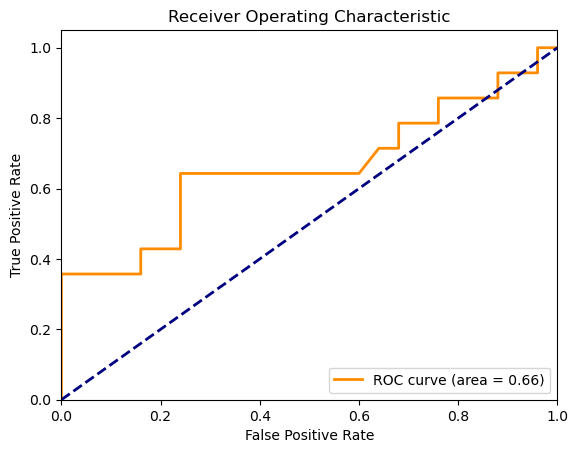

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve and AUC score for the test data
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## SMOTE + hyperparam gradient boosting

In [76]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# Separate features and target
X = cdf.drop(['Company','month','day', 'vacancy quantity', 'Selected','Pasir Ris Central', 'Pasir Ris East', 'Pasir Ris West',
              'Punggol Coast', 'Punggol Shore', 'Punggol West', 'Successful Placement'], axis=1)
y = cdf['Successful Placement']

# Apply SMOTE with n_neighbors=2
smote = SMOTE(k_neighbors=2, random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Split the SMOTE resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_leaf': [15, 25],
    'subsample': [0.8, 0.9]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model on the training data
best_model = grid_search.best_estimator_
y_pred_train_hgb = best_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_hgb))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train_hgb))
print("Training AUC-ROC:", roc_auc_score(y_train, best_model.predict_proba(X_train)[:, 1]))

# Evaluate the best model on the test data
y_pred_test_hgb = best_model.predict(X_test)
print("\nTesting Accuracy:", accuracy_score(y_test, y_pred_test_hgb))
print("Testing Classification Report:\n", classification_report(y_test, y_pred_test_hgb))
print("Testing AUC-ROC:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 25, 'n_estimators': 200, 'subsample': 0.8}
Training Accuracy: 0.9786096256684492
Training Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        97
           1       0.98      0.98      0.98        90

    accuracy                           0.98       187
   macro avg       0.98      0.98      0.98       187
weighted avg       0.98      0.98      0.98       187

Training AUC-ROC: 0.9981672394043528

Testing Accuracy: 0.6808510638297872
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.70      0.65        20
           1       0.75      0.67      0.71        27

    accuracy                           0.68        47
   macro avg       0.68      0.68      0.68        47
weighted avg       0.69      0.68      0.

In [77]:
from sklearn.metrics import f1_score

# Calculate weighted F1 scores for the test and train sets
f1_test = f1_score(y_test, y_pred_test_hgb, average='weighted')
f1_train = f1_score(y_train, y_pred_train_hgb, average='weighted')

# Print the F1 scores
print("Weighted F1 Score for Test Set:", f1_test)
print("Weighted F1 Score for Training Set:", f1_train)

Weighted F1 Score for Test Set: 0.6825974328375586
Weighted F1 Score for Training Set: 0.9786096256684492


## Deployment phase

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Separate features and target
X = cdf.drop(['Company', 'month', 'day', 'vacancy quantity', 'Selected', 'Pasir Ris Central', 'Pasir Ris East', 'Pasir Ris West',
              'Punggol Coast', 'Punggol Shore', 'Punggol West', 'Successful Placement'], axis=1)
y = cdf['Successful Placement']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model without regularization
log_reg = LogisticRegression(penalty=None, max_iter=1000000)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Predict outcomes for the entire dataset
cdf['Predicted_Outcome'] = log_reg.predict(X)

# Display the columns 'Successful Placement' and 'Predicted_Outcome'
print(cdf[['Successful Placement', 'Predicted_Outcome']].head())



   Successful Placement  Predicted_Outcome
0                     0                  0
1                     0                  0
2                     0                  0
3                     1                  0
4                     0                  0


## Reorganizing the entire dataset before visualizing

In [79]:
odf = odf.merge(cdf[['Predicted_Outcome']], left_index=True, right_index=True)
odf['Predicted_Outcome'] = odf['Predicted_Outcome'].replace({1: 'yes', 0: 'no'})

# Display the first few rows to verify the merge
print(odf.head())


                               Company              Industry        Date  \
0   active global respite care pte ltd  Healthcare & welfare  8 feb 2023   
1              breadtalk group pte ltd                   Fnb  8 feb 2023   
2       caregiving welfare association        Social service  8 feb 2023   
3   dhl supply chain singapore pte ltd                        8 feb 2023   
4         holiday inn singapore atrium          Hospitality   8 feb 2023   

   vacancy quantity  Interviewed  KIV  Rejected  Selected Rank & file PMET  \
0                31            3    2         1         0           Y    Y   
1               467           16   14         1         1           Y    Y   
2                40            2    1         1         0           N    Y   
3               152            9    2         3         4           Y    Y   
4                18            2    1         0         1           Y    Y   

   ...  Experience/\nQualification      Health / Medical / Age / Others  \

In [80]:
odf.drop(['Distance', 'Salary', 'Hours', 'Suitability Issue', 'Experience/\nQualification', 'Health / Medical / Age / Others', 'Salary.1'], axis=1, inplace=True)
odf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company               195 non-null    object
 1   Industry              195 non-null    object
 2   Date                  195 non-null    object
 3   vacancy quantity      195 non-null    int64 
 4   Interviewed           195 non-null    int64 
 5   KIV                   195 non-null    int64 
 6   Rejected              195 non-null    int64 
 7   Selected              195 non-null    int64 
 8   Rank & file           195 non-null    object
 9   PMET                  195 non-null    object
 10  Region                195 non-null    object
 11  Method                195 non-null    object
 12  Successful Placement  195 non-null    int64 
 13  Pasir Ris Central     195 non-null    int64 
 14  Pasir Ris East        195 non-null    int64 
 15  Pasir Ris West        195 non-null    in

In [81]:
# Create a new column 'New_Column' based on 'Successful Placement'
odf['Successful Placement v2'] = odf['Successful Placement'].apply(lambda x: 'yes' if x != 0 else 'no')

In [82]:
odf = odf.merge(cdf[['Pasir ris', 'Punggol']], left_index=True, right_index=True)
odf.head()

,Company,Industry,Date,vacancy quantity,Interviewed,KIV,Rejected,Selected,Rank & file,PMET,...,Pasir Ris East,Pasir Ris West,Punggol Coast,Punggol Shore,Punggol West,Sengkang & Others,Predicted_Outcome,Successful Placement v2,Pasir ris,Punggol
0,active global respite care pte ltd,Healthcare & welfare,8 feb 2023,31,3,2,1,0,Y,Y,...,0,0,0,1,0,2,no,no,0,1
1,breadtalk group pte ltd,Fnb,8 feb 2023,467,16,14,1,1,Y,Y,...,3,1,1,2,0,9,no,no,4,3
2,caregiving welfare association,Social service,8 feb 2023,40,2,1,1,0,N,Y,...,0,0,0,0,0,1,no,no,1,0
3,dhl supply chain singapore pte ltd,,8 feb 2023,152,9,2,3,4,Y,Y,...,4,1,0,0,1,3,no,yes,5,1
4,holiday inn singapore atrium,Hospitality,8 feb 2023,18,2,1,0,1,Y,Y,...,0,1,0,0,0,1,no,no,1,0


In [83]:
# Define a dictionary mapping regions to postal codes
postal_code_map = {
    'One punggol cc': '828629',
    'Pasir ris elias cc': '519498',
    'Pasir ris east cc': '519457',
    'Punggol 21 cc': '828815',
    'Punggol west cc': '823259',
    'Rivervale cc': '544583',
    'Sengkang cc': '545025'
}

# Create the new 'postal code' column using the map function
odf['postal code'] = odf['Region'].map(postal_code_map)

print(odf[['Region', 'postal code']].head())



               Region postal code
0  Pasir ris elias cc      519498
1  Pasir ris elias cc      519498
2  Pasir ris elias cc      519498
3  Pasir ris elias cc      519498
4  Pasir ris elias cc      519498


## Finalized & exported

In [84]:
#odf.to_excel('finalized_mp.xlsx', index=False)